# 📘 01 - Hypothesis Testing

🔹 **Objective**: Introduce hypothesis testing through a relatable story, while explaining the intuition, math, and Python implementation behind it.

## 📖 Meet Cafe Zenith
Imagine you're the data analyst at **Cafe Zenith**, a cozy coffee shop in a tech park. Your manager, Priya, believes that their new espresso blend has improved customer satisfaction. But she's not sure if it's **really** better — or if it's just a **random coincidence**.

Your job? Use **hypothesis testing** to help her decide based on data.

This notebook will walk you through the entire process using this fun, practical example.

## 🔍 What is Hypothesis Testing?
Hypothesis testing is a statistical decision-making tool used to evaluate claims about a population using a sample.

In our story:
- Priya believes the **new espresso blend increased average customer rating**.
- You have a **sample of customer ratings** before and after introducing the new blend.

### 🎯 Null vs. Alternative Hypotheses
You formulate two competing claims:

- **Null Hypothesis (H₀)**: The average rating is unchanged. (No improvement)
- **Alternative Hypothesis (H₁)**: The average rating has increased. (Improvement!)

You will use sample data to decide whether to reject H₀ in favor of H₁.

### 🧭 One-Tailed vs. Two-Tailed Test
Since Priya is specifically interested in whether the new blend **increased** ratings (not just changed them), you choose a **one-tailed test**.

If she were open to it getting worse, you’d do a two-tailed test.

### 🚨 Type I vs. Type II Errors
- **Type I Error**: You say the blend improved ratings when it didn't. (False positive — costly for Priya)
- **Type II Error**: You miss the fact that it did improve. (Lost opportunity!)

### 💡 p-value Intuition
A p-value answers this question:
> *If the new blend had **no effect**, what is the probability that we'd observe results as extreme as this sample?*

If that probability (p-value) is small — say < 0.05 — you reject the null hypothesis.

## 🧪 Simulate Cafe Ratings Data

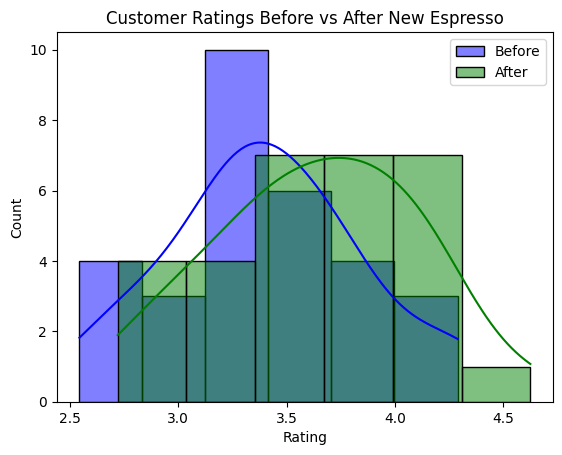

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

# Ratings: before and after new espresso blend
before = np.random.normal(loc=3.5, scale=0.5, size=30)  # out of 5
after = np.random.normal(loc=3.7, scale=0.5, size=30)

sns.histplot(before, label='Before', kde=True, color='blue')
sns.histplot(after, label='After', kde=True, color='green')
plt.legend()
plt.title("Customer Ratings Before vs After New Espresso")
plt.xlabel("Rating")
plt.show()

## 🧭 Step-by-Step Hypothesis Testing
Let's run a **two-sample t-test** to compare the ratings before and after.

1. **State Hypotheses**:
   - H₀: μ_after = μ_before
   - H₁: μ_after > μ_before (one-tailed)
2. **Choose Significance Level**: α = 0.05
3. **Compute t-statistic and p-value**
4. **Interpret Result**

In [2]:
t_stat, p_val = stats.ttest_ind(after, before)
print("t-statistic:", round(t_stat, 4))
print("two-tailed p-value:", round(p_val, 4))

# Since we want a one-tailed test (greater), divide p by 2
p_val_one_tailed = p_val / 2
print("one-tailed p-value:", round(p_val_one_tailed, 4))

alpha = 0.05
if p_val_one_tailed < alpha:
    print("✅ Result: Reject H₀ — The new espresso has improved ratings!")
else:
    print("❌ Result: Fail to reject H₀ — Not enough evidence yet.")

t-statistic: 1.9752
two-tailed p-value: 0.053
one-tailed p-value: 0.0265
✅ Result: Reject H₀ — The new espresso has improved ratings!


## 📊 Bonus: Chi-Square Test — Are Preferences Gender-Based?
Priya also wants to know if men and women have different preferences for espresso vs. cappuccino.
Let's use a **Chi-Square Test for Independence**.

In [3]:
import pandas as pd
from scipy.stats import chi2_contingency

# Contingency Table
data = pd.DataFrame({
    'Espresso': [30, 10],
    'Cappuccino': [20, 40]
}, index=['Male', 'Female'])

chi2, p, dof, expected = chi2_contingency(data)
print("Chi2 statistic:", round(chi2, 4))
print("p-value:", round(p, 4))

if p < 0.05:
    print("✅ Preferences differ by gender!")
else:
    print("❌ Preferences appear independent of gender.")

Chi2 statistic: 15.0417
p-value: 0.0001
✅ Preferences differ by gender!


## 📌 Summary
- Hypothesis testing helps make data-backed decisions
- Always define H₀ and H₁ clearly
- p-value shows how surprising the data is under H₀
- Use t-tests for means, chi-square for categories

**Priya** now has evidence the espresso is a hit — thanks to you! ☕📈